<a href="https://colab.research.google.com/github/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas (imports) e Macros

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
new_cols = {}
remove_cols = set()

# EDA

## Panorama

In [265]:
# ler train.csv
df = pd.read_csv('https://raw.githubusercontent.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/main/train.csv',
                 index_col = 0)

# verificar numero de linhas e colunas
df.shape

(1460, 80)

In [266]:
# Uma primeira visualizacao dos dados
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [267]:
# Verificar colunas, número de entradas não nulas e tipo das colunas
# Batendo dados com o dicionário: https://github.com/jpdefo/House-Prices-Advanced-Regression-Technique-Ada-ML2s-/blob/main/data_description.txt
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Pontos de Atenção:
- MSSubClass é categórico
- Street é binário [Grvl/Pave]
- OverallQual é uma nota (likert)
- OverallCond é uma nota (likert)
- CentralAir é binário [N/Y]

Colunas com muitos nulos:
- Alley
- FireplaceQu
- PoolQC
- Fence
- MiscFeature

In [268]:
# transformar numeros que representam categorias em objetos
# df[['MSSubClass', 'OverallQual', 'OverallCond']] =
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
df[['MSSubClass', 'OverallQual', 'OverallCond']].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

In [269]:
# listar apenas as colunas que possuem valores nulos
df.isnull().sum()[df.isnull().sum() > 0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Sera estudado caso a caso para saber se removemos ou não.
As colunas binárias serão tratadas junto com as demais categoricas se necessário alguma camada de encoding.

In [270]:
# Examinando colunas numéricas
col_num = df.select_dtypes(include= 'number').columns
print('colunas numéricas:', len(col_num))
print(col_num)

colunas numéricas: 34
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [271]:
# Examinando colunas categóricas
col_cat = df.select_dtypes(exclude= 'number').columns
print('colunas numéricas:', len(col_cat))
print(col_cat)

colunas numéricas: 46
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


## Hipoteses

### Testar se há relacao entre:
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet

In [272]:
# LowQualFinSF is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['LowQualFinSF'] ).sort_values()

Id
126      286
171      326
534      334
1101     438
52       456
        ... 
1170    3627
692     4316
1183    4476
524     4676
1299    5642
Length: 1460, dtype: int64

In [273]:
# GrLivArea is equal the sum of 1st and 2nd floor?
( df['1stFlrSF'] + df['2ndFlrSF'] - df['GrLivArea'] ).sort_values()

Id
186    -572
171    -528
636    -515
1010   -514
89     -513
       ... 
490       0
489       0
488       0
486       0
1460      0
Length: 1460, dtype: int64

In [274]:
# GrLivArea is equal the sum of the rest?
( df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF'] - df['GrLivArea'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

GrLivArea é a soma de 1stFlrSF, 2ndFlrSF e LowQualFinSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes

In [275]:
df = df.drop(columns= 'GrLivArea')
remove_cols.add('GrLivArea')

### Testar se há relacao entre:
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area

In [276]:
# TotalBsmtSF is equal the sum of the rest?
( df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF'] - df['TotalBsmtSF'] ).sort_values()

Id
1       0
979     0
978     0
977     0
976     0
       ..
483     0
482     0
481     0
479     0
1460    0
Length: 1460, dtype: int64

TotalBsmtSF é a soma de BsmtFinSF1, BsmtFinSF2 e BsmtUnfSF

Isso será considerado na hora de treinar o modelo, devido as colunas serem linearmente dependentes

In [277]:
df = df.drop(columns= 'TotalBsmtSF')
remove_cols.add('TotalBsmtSF')

## Colunas com muitos nulos

#### PoolQC (1453 nulos)

In [278]:
# A pesar de existir "NA"("No Pool"), let's see its relation to PoolArea
df[df.PoolQC.isna()]['PoolArea'].unique()

array([0])

In [279]:
# Podemos preencher os valores com "NA"
df.loc[df.PoolQC.isna(), 'PoolQC'] = "N/A"
df.PoolQC.isna().sum()

0

In [280]:
# Verificar a distribuicao dos valores
df.PoolQC.value_counts()

N/A    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [281]:
# Como essas categorias são muito pouco representativas, vamos eliminar a coluna
remove_cols.add('PoolQC')
if 'PoolQC' in df:
    df = df.drop(columns= 'PoolQC')
print('PoolQC' in df)

False


#### MiscFeature (1406 nulos)

In [282]:
# Os valores representam outas caracteristicas nao representadas em outra colunas. No dicionario:
# MiscFeature: Miscellaneous feature not covered in other categories
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF) -> barracão
#        TenC	Tennis Court
#        NA	None
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [283]:
# Como há poucos valores para outras categorias alem de Shed (barracão),
# Vamos trocar a coluna para shed
def Shed_extraction(df_base):
    return np.where(df_base.MiscFeature == 'Shed', 'Y', 'N')

new_cols['Shed'] = Shed_extraction

df['Shed'] = Shed_extraction(df)
df['Shed'].value_counts()

N    1411
Y      49
Name: Shed, dtype: int64

In [284]:
# Removendo antiga colunas
remove_cols.add('MiscFeature')
if 'MiscFeature' in df:
    df = df.drop(columns= 'MiscFeature')
print('MiscFeature' in df)

False


#### Alley (1369 nulos)

In [285]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# Alley: Type of alley access to property
    # Grvl	Gravel
    # Pave	Paved
    # NA 	No alley access
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [286]:
# Preencher os nulos com NA para evitar confusão
df.loc[df.Alley.isna(), 'Alley'] = "N/A"
df['Alley'].value_counts()

N/A     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [287]:
# Como as categorias sao pouco representadas e temos:
    #    Grvl	Gravel
    #    Pave	Paved
# Vamos agrupar em tem ou nao
def Alley_exist(df_base):
    return np.where(df_base.Alley.isna() | (df_base.Alley == 'N/A'), 'N', 'Y')

new_cols['Alley'] = Alley_exist
df.Alley = Alley_exist(df)

#### Fence (1179 nulos)

In [288]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fence
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [289]:
# Preencher os nulos com NA para evitar confusão
df.loc[df.Fence.isna(), 'Fence'] = "N/A"
df['Fence'].value_counts()

N/A      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [290]:
# Como as categorias sao pouco representadas e temos:
    #    GdPrv	Good Privacy
    #    MnPrv	Minimum Privacy
    #    GdWo	Good Wood
    #    MnWw	Minimum Wood/Wire
# Vamos agrupar as de privacidade
def FencePrivacy_extraction(df_base):
    return np.where((df_base.Fence == 'GdPrv') | (df_base.Fence == 'MnPrv'), 'Y', 'N')

new_cols['FencePrivacy'] = FencePrivacy_extraction
df['FencePrivacy'] = FencePrivacy_extraction(df)
df['FencePrivacy'].value_counts()

N    1244
Y     216
Name: FencePrivacy, dtype: int64

In [291]:
# Removendo antiga colunas
remove_cols.add('Fence')
if 'Fence' in df:
    df = df.drop(columns= 'Fence')
print('Fence' in df)

False


#### LotFrontage (259 nulos)

<Axes: ylabel='Frequency'>

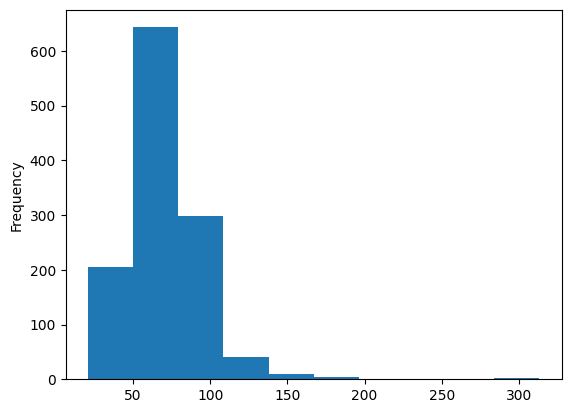

In [292]:
# como é uma variavel numerica, vamos avaliar a distribuicao
df.LotFrontage.plot.hist()

In [293]:
# olhando alguns dados das nulas
df[df.LotFrontage.isna()][['LotArea', 'Street', 'Alley']].sort_values('LotArea')

,LotArea,Street,Alley
Id,,,
1087,1974,Pave,N
1359,2117,Pave,N
181,2117,Pave,N
624,2117,Pave,N
976,2651,Pave,N
...,...,...,...
458,53227,Pave,N
1397,57200,Pave,N
707,115149,Pave,N


In [294]:
# Porcentagem de nulos
print(f'{ df.LotFrontage.isna().sum() / df.shape[0] :.1%}')

17.7%


<Axes: ylabel='Frequency'>

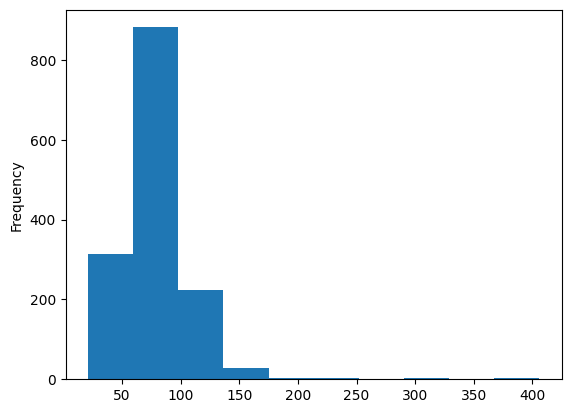

In [295]:
# Como muitos dos dados são nulos, e 'LotArea' nunca é nulo,
# podemos inputar o valor como sendo raiz da area, numa aproximação
# do lote para um quadrado
def LotFrontage_sqrt_area(df_base):
    return df.LotFrontage.fillna(value= np.sqrt(df_base.LotArea))

LotFrontage_sqrt_area(df).plot.hist()

O formato do histograma se mantem

In [296]:
new_cols['LotFrontage'] = LotFrontage_sqrt_area
df['LotFrontage'] = LotFrontage_sqrt_area(df)
df['LotFrontage'].isna().sum()

0

#### FireplaceQu (690 nulos)


In [297]:
# verificar se os nulos sao os "NA" descritos no data_description.txt
# NA 	No Fireplace
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [298]:
# Bater com a quantidade de lareiras: Fireplaces
df[df.FireplaceQu.isna()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [299]:
# Inserir NA no lugar dos nulos
df.FireplaceQu = df.FireplaceQu.fillna('N/A')
df.FireplaceQu.value_counts()

N/A    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [300]:
# Como há pouca representatividade de algumas categorias, vamos agrupá-las sabendo que:
    #    Ex	Excellent - Exceptional Masonry Fireplace
    #    Gd	Good - Masonry Fireplace in main level
    #    TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    #    Fa	Fair - Prefabricated Fireplace in basement
    #    Po	Poor - Ben Franklin Stove
# Vamos separar por qualidade:
def FireplaceQuality_extraction(df_base):
    return df_base.FireplaceQu.map(
        {
            'Ex' : 'AboveAvg',
            'Gd' : 'AboveAvg',
            'TA' : 'AvgOrBelow',
            'Fa' : 'AvgOrBelow',
            'Po' : 'AvgOrBelow'
        }
    ).fillna('N/A')

new_cols['FireplaceQu'] = LotFrontage_sqrt_area
df['FireplaceQu'] = FireplaceQuality_extraction(df)
df['FireplaceQu'].value_counts()

N/A           690
AboveAvg      404
AvgOrBelow    366
Name: FireplaceQu, dtype: int64

## Colunas com poucos nulos

In [301]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values()

Electrical       1
MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

## Visualização de variáveis numéricas

In [308]:
# atualizando colunas numéricas
col_num = df.select_dtypes(include= 'number').columns
col_num

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

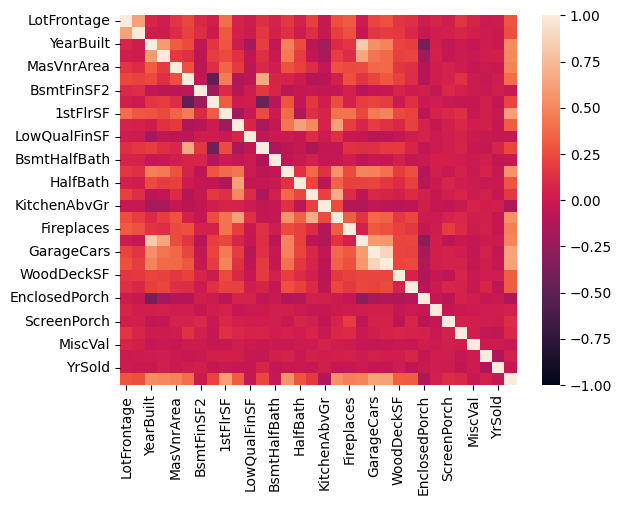

In [309]:
# Correlaçoes
_ = sns.heatmap(df[col_num].corr(), vmax= 1, vmin= -1)

In [310]:
# correlation matrix, with "Y-columns" as a column 'var1'
corr = df[col_num].corr().reset_index().rename(columns= {'index' : 'var1'})

# wide to long such as each row is: var1 - var2 - corr(var1, var2)
corr = corr.melt(id_vars= 'var1', var_name= 'var2')

# eliminar linhas da diagonal principal
corr = corr[corr.var1 != corr.var2]

# eliminar valores espelhados da matrix
corr[['var1', 'var2']] = corr.apply(
    lambda row: pd.Series(sorted(row[['var1', 'var2']])),
    axis=1
    )
corr = corr.drop_duplicates()

# Mostrar os valores com alta correlação
corr[np.abs(corr.value) > 0.8]

,var1,var2,value
83,GarageYrBlt,YearBuilt,0.825667
661,GarageArea,GarageCars,0.882475


In [311]:
# Vamos dropar essas colunas com alta correlação
# GarageYrBlt e GarageCars parecem menos relevantes
df = df.drop(columns= ['GarageYrBlt', 'GarageCars'])
remove_cols.update(['GarageYrBlt', 'GarageCars'])
remove_cols

{'Fence',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'MiscFeature',
 'PoolQC',
 'TotalBsmtSF'}

# Modelo de predição

In [ ]:
#teste train split pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.3, random_state=0)

#Criar X_Cols com apenas colunas numericas
X_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train = X_train[X_cols]
X_test = X_test[X_cols]

#trocar NaN por 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
#criar pipeline Random Forest
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('scaler', StandardScaler()), ('', RandomForestRegressor())])

#treinar modelo
pipeline.fit(X_train, y_train)

#fazer previsões
y_pred = pipeline.predict(X_test)

#avaliar modelo]
from sklearn.metrics import mean_squared_error
import numpy as np
print(np.sqrt(mean_squared_error(y_test, y_pred)))
#print outras metricas


31593.12574652937


In [ ]:
#log do erro
print(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))))

0.139431397564966


In [ ]:
#describe saleprice
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
#df head Exterior1st
df['Exterior1st'].head(20)

0     VinylSd
1     MetalSd
2     VinylSd
3     Wd Sdng
4     VinylSd
5     VinylSd
6     VinylSd
7     HdBoard
8     BrkFace
9     MetalSd
10    HdBoard
11    WdShing
12    HdBoard
13    VinylSd
14    MetalSd
15    Wd Sdng
16    Wd Sdng
17    MetalSd
18    VinylSd
19    BrkFace
Name: Exterior1st, dtype: object

# Resultado do Desafio

In [ ]:
#read test.csv
df_test = pd.read_csv('test.csv')

In [ ]:
#fazer previsao para test.csv, e escrever a resposta no arquivo csv
df_test.fillna(0, inplace=True)
y_pred_test = pipeline.predict(df_test[X_cols])
#fill nan with 0

df_test['SalePrice'] = y_pred_test

df_test[['Id', 'SalePrice']].to_csv('submission.csv', index=False)

